In [36]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the config of plots created.


# Importing video game dataset

df = pd.read_csv(r'C:\Users\overl\OneDrive\Documents\Docs\PortfolioProject\datasets\vidgames\vgsales.csv')

In [47]:
# Verifing import

df.head()

,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
1960,26,11517,35,2006.0,580,1852,7.7,41.36,29.02,3.77,8.51,82.65
0,70,9720,15,1985.0,580,1852,10.0,29.08,3.58,6.81,0.77,40.24
1221,78,5828,35,2008.0,580,1852,8.2,15.91,12.92,3.80,3.35,35.98
1489,91,11519,35,2009.0,580,1852,8.0,15.61,10.99,3.29,3.02,32.90
86,94,7686,7,1998.0,580,1040,9.4,11.27,8.89,10.22,1.00,31.37


In [7]:
# Checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Rank - 0.0%
Name - 0.0%
Platform - 0.0%
Year - 0.026374859708193043%
Publisher - 0.0%
Developer - 0.0%
Critic_Score - 0.0%
NA_Sales - 0.0%
PAL_Sales - 0.0%
JP_Sales - 0.0%
Other_Sales - 0.0%
Global_Sales - 0.0%


In [8]:
# Double check data types for columns

df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Publisher        object
Developer        object
Critic_Score    float64
NA_Sales        float64
PAL_Sales       float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [39]:
# Ordering by Global Sales

df = df.sort_values(by=['Global_Sales'], inplace=False, ascending=False)

In [11]:
# Remove row limit on display

pd.set_option('display.max_rows', None)

<function matplotlib.pyplot.show(close=None, block=None)>

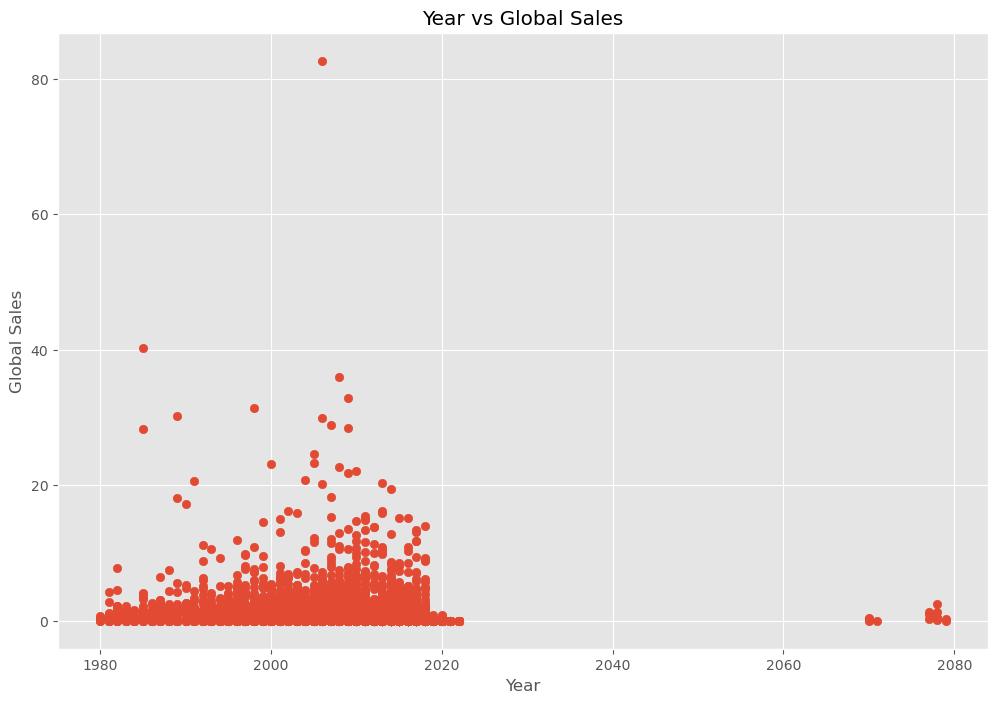

In [18]:
# Scatter plot with Year vs Global Sales

plt.scatter(x=df['Year'], y=df['Global_Sales'])

plt.title('Year vs Global Sales')

plt.xlabel('Year')

plt.ylabel('Global Sales')

plt.show

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

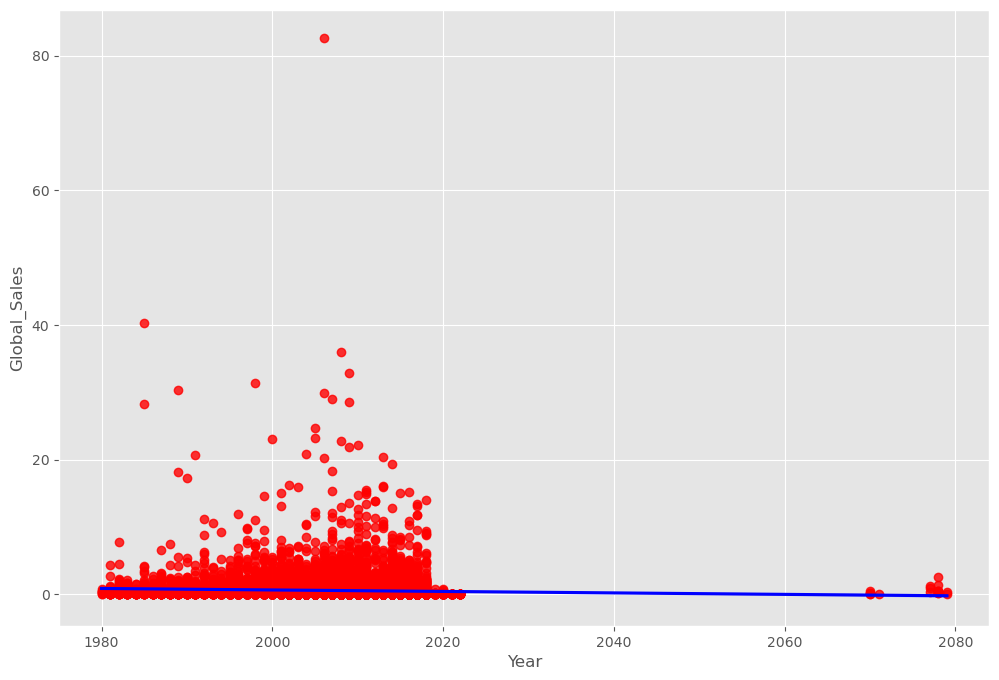

In [23]:
# Seaborn regression plot

sns.regplot(x='Year', y='Global_Sales', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [28]:
# Checking correlations between columns

df.corr(method='pearson') #pearson, kendall, spearman

,Rank,Year,Critic_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.073791,-0.247686,-0.340954,-0.329954,-0.219332,-0.292913,-0.365133
Year,0.073791,1.000000,0.000775,-0.066950,0.014947,-0.128713,0.038862,-0.050304
Critic_Score,-0.247686,0.000775,1.000000,0.259331,0.265773,0.144739,0.233175,0.279695
NA_Sales,-0.340954,-0.066950,0.259331,1.000000,0.757234,0.452754,0.657013,0.938755
PAL_Sales,-0.329954,0.014947,0.265773,0.757234,1.000000,0.430855,0.746361,0.901328
JP_Sales,-0.219332,-0.128713,0.144739,0.452754,0.430855,1.000000,0.295754,0.610933
Other_Sales,-0.292913,0.038862,0.233175,0.657013,0.746361,0.295754,1.000000,0.768114
Global_Sales,-0.365133,-0.050304,0.279695,0.938755,0.901328,0.610933,0.768114,1.000000


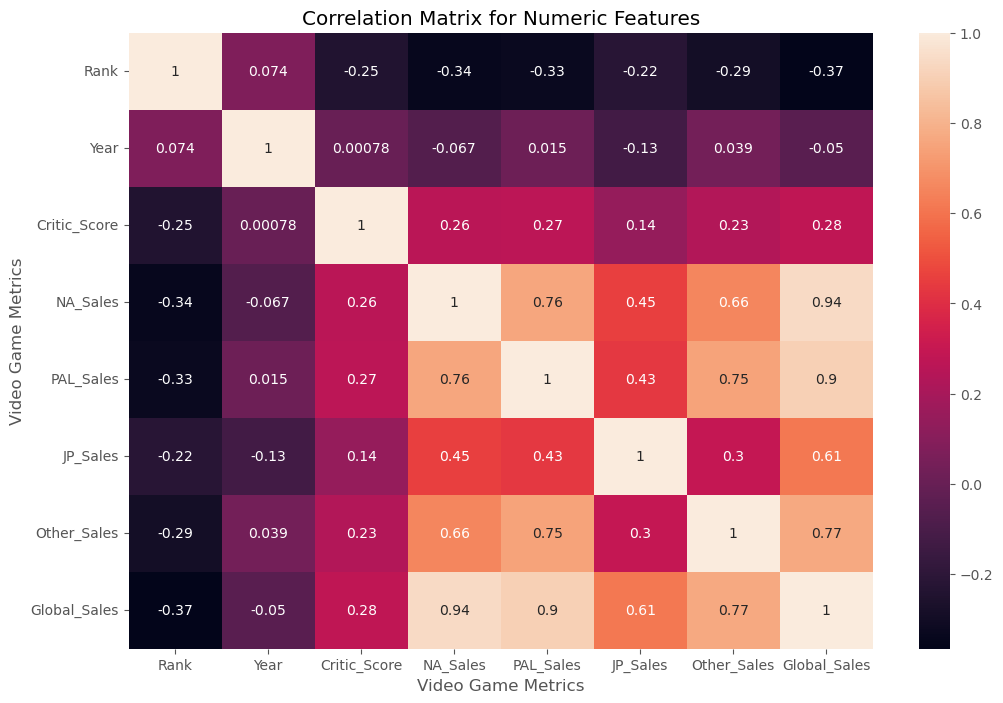

In [31]:
#Presenting the correlations as a heat map

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Video Game Metrics')

plt.ylabel('Video Game Metrics')

plt.show()

In [46]:
# Numerizing columns

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
            
df_numerized.head()

,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
1960,26,11517,35,2006.0,580,1852,7.7,41.36,29.02,3.77,8.51,82.65
0,70,9720,15,1985.0,580,1852,10.0,29.08,3.58,6.81,0.77,40.24
1221,78,5828,35,2008.0,580,1852,8.2,15.91,12.92,3.80,3.35,35.98
1489,91,11519,35,2009.0,580,1852,8.0,15.61,10.99,3.29,3.02,32.90
86,94,7686,7,1998.0,580,1040,9.4,11.27,8.89,10.22,1.00,31.37


In [48]:
df.head()

,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
1960,26,11517,35,2006.0,580,1852,7.7,41.36,29.02,3.77,8.51,82.65
0,70,9720,15,1985.0,580,1852,10.0,29.08,3.58,6.81,0.77,40.24
1221,78,5828,35,2008.0,580,1852,8.2,15.91,12.92,3.80,3.35,35.98
1489,91,11519,35,2009.0,580,1852,8.0,15.61,10.99,3.29,3.02,32.90
86,94,7686,7,1998.0,580,1040,9.4,11.27,8.89,10.22,1.00,31.37


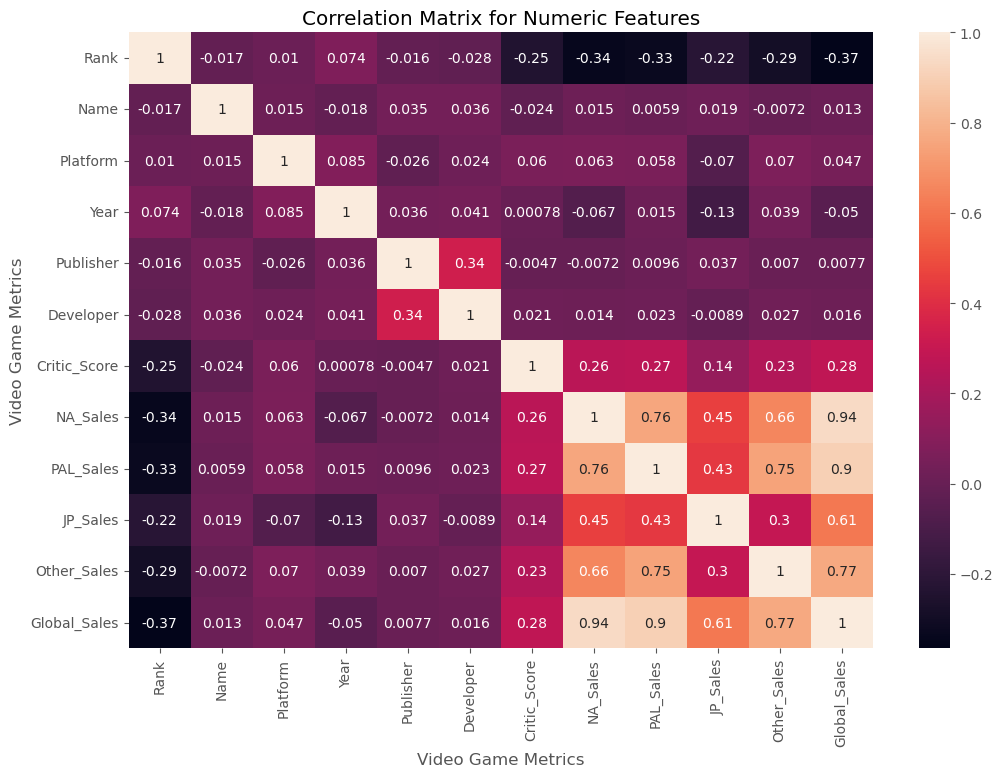

In [41]:
# Creating correlation heat map with new numerized columns

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Video Game Metrics')

plt.ylabel('Video Game Metrics')

plt.show()

In [42]:
# Unstacking correlations

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

Rank          Rank            1.000000
              Name           -0.017159
              Platform        0.010052
              Year            0.073791
              Publisher      -0.016014
              Developer      -0.027837
              Critic_Score   -0.247686
              NA_Sales       -0.340954
              PAL_Sales      -0.329954
              JP_Sales       -0.219332
              Other_Sales    -0.292913
              Global_Sales   -0.365133
Name          Rank           -0.017159
              Name            1.000000
              Platform        0.015010
              Year           -0.018348
              Publisher       0.035487
              Developer       0.036335
              Critic_Score   -0.024354
              NA_Sales        0.014966
              PAL_Sales       0.005904
              JP_Sales        0.019162
              Other_Sales    -0.007241
              Global_Sales    0.012635
Platform      Rank            0.010052
              Name       

In [44]:
# Sorting unstacked correlations

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

Global_Sales  Rank           -0.365133
Rank          Global_Sales   -0.365133
NA_Sales      Rank           -0.340954
Rank          NA_Sales       -0.340954
PAL_Sales     Rank           -0.329954
Rank          PAL_Sales      -0.329954
              Other_Sales    -0.292913
Other_Sales   Rank           -0.292913
Critic_Score  Rank           -0.247686
Rank          Critic_Score   -0.247686
              JP_Sales       -0.219332
JP_Sales      Rank           -0.219332
Year          JP_Sales       -0.128713
JP_Sales      Year           -0.128713
Platform      JP_Sales       -0.070203
JP_Sales      Platform       -0.070203
Year          NA_Sales       -0.066950
NA_Sales      Year           -0.066950
Global_Sales  Year           -0.050304
Year          Global_Sales   -0.050304
Rank          Developer      -0.027837
Developer     Rank           -0.027837
Publisher     Platform       -0.026194
Platform      Publisher      -0.026194
Critic_Score  Name           -0.024354
Name          Critic_Scor

In [45]:
# Finding high correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

JP_Sales      Global_Sales    0.610933
Global_Sales  JP_Sales        0.610933
NA_Sales      Other_Sales     0.657013
Other_Sales   NA_Sales        0.657013
PAL_Sales     Other_Sales     0.746361
Other_Sales   PAL_Sales       0.746361
PAL_Sales     NA_Sales        0.757234
NA_Sales      PAL_Sales       0.757234
Global_Sales  Other_Sales     0.768114
Other_Sales   Global_Sales    0.768114
Global_Sales  PAL_Sales       0.901328
PAL_Sales     Global_Sales    0.901328
NA_Sales      Global_Sales    0.938755
Global_Sales  NA_Sales        0.938755
Rank          Rank            1.000000
JP_Sales      JP_Sales        1.000000
PAL_Sales     PAL_Sales       1.000000
NA_Sales      NA_Sales        1.000000
Critic_Score  Critic_Score    1.000000
Developer     Developer       1.000000
Publisher     Publisher       1.000000
Year          Year            1.000000
Platform      Platform        1.000000
Name          Name            1.000000
Other_Sales   Other_Sales     1.000000
Global_Sales  Global_Sale